In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing

from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from nltk import bigrams
from nltk import trigrams  
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


import sklearn.metrics as metrics

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv(r'C:\Madhan\Analytics\Machine_Learning_project_work\Great_Lakes_AIML\Capstone\consumer-court-models\src\Data\auxilliary-models\CT_and_JT_Lines_2019-03-10_22-06-53.csv')

In [3]:
df.head()

,Unnamed: 0,HTML_File_Name,Line_of_Text,Label
0,0,Delhi-CC_361_2018-2018-04-17.html,The complainant has come forward on the allega...,COMPLAINT_TEXT
1,1,Delhi-CC_361_2018-2018-04-17.html,which had been booked with OP-1. She has paid ...,COMPLAINT_TEXT
2,2,Delhi-CC_361_2018-2018-04-17.html,two parking space which were a part of the com...,COMPLAINT_TEXT
3,3,Delhi-CC_361_2018-2018-04-17.html,"complainant was entitled to refund of Rs.1,30,...",COMPLAINT_TEXT
4,4,Delhi-CC_361_2018-2018-04-17.html,been charged extra by OP-1. Interest on the sa...,COMPLAINT_TEXT


In [4]:
df.Label.value_counts()

JUDGEMENT_ORDER_TEXT    24373
COMPLAINT_TEXT           7086
Name: Label, dtype: int64

In [5]:
df['state'] = df.HTML_File_Name.str[0:5]

In [6]:
df.state.value_counts()

Delhi    11134
West_    10650
NCDRC     5797
Chand     3878
Name: state, dtype: int64

## Encoding State column

In [7]:
df['state_enc'] = df["state"].values
print("BEFORE ENCODING : {}".format(df.state_enc[0:10]))

print("")

le = preprocessing.LabelEncoder()
le.fit(df.state)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

df['state_enc'] = le.transform(df.state_enc)

print(df.state_enc.value_counts())
print(df.state.value_counts())

BEFORE ENCODING : 0    Delhi
1    Delhi
2    Delhi
3    Delhi
4    Delhi
5    Delhi
6    Delhi
7    Delhi
8    Delhi
9    Delhi
Name: state_enc, dtype: object

ENCODED CLASSES : ['Chand' 'Delhi' 'NCDRC' 'West_']

1    11134
3    10650
2     5797
0     3878
Name: state_enc, dtype: int64
Delhi    11134
West_    10650
NCDRC     5797
Chand     3878
Name: state, dtype: int64


#### 0: Chandigarh, 1: Delhi, 2: NCRDC, 3: WestBengal

In [8]:
df['Labelenc'] = df["Label"].values
print("BEFORE ENCODING : {}".format(df.Labelenc[0:10]))

print("")

le = preprocessing.LabelEncoder()
le.fit(df.Label)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

df['Labelenc'] = le.transform(df.Labelenc)

print(df.Labelenc.value_counts())
print(df.Label.value_counts())

BEFORE ENCODING : 0          COMPLAINT_TEXT
1          COMPLAINT_TEXT
2          COMPLAINT_TEXT
3          COMPLAINT_TEXT
4          COMPLAINT_TEXT
5          COMPLAINT_TEXT
6    JUDGEMENT_ORDER_TEXT
7    JUDGEMENT_ORDER_TEXT
8    JUDGEMENT_ORDER_TEXT
9    JUDGEMENT_ORDER_TEXT
Name: Labelenc, dtype: object

ENCODED CLASSES : ['COMPLAINT_TEXT' 'JUDGEMENT_ORDER_TEXT']

1    24373
0     7086
Name: Labelenc, dtype: int64
JUDGEMENT_ORDER_TEXT    24373
COMPLAINT_TEXT           7086
Name: Label, dtype: int64


### 0 is Complainant Text and 1 is Judgement Text

In [9]:
X = df.Line_of_Text

In [10]:
y = df.Labelenc

In [16]:
X_train_txt, X_test_txt, y_train, y_test, state_train,state_test = train_test_split(X, y, df.state_enc,test_size=0.2, random_state=1)

In [18]:
state_train.shape

(25167,)

In [12]:
X_train_txt.shape

(25167,)

In [13]:
X_test_txt.shape

(6292,)

In [14]:
y_train.shape

(25167,)

In [15]:
y_test.shape

(6292,)

In [19]:
import scipy as sp

In [25]:
state_train = np.array(state_train)

In [26]:
state_train

array([0, 3, 1, ..., 1, 0, 1], dtype=int64)

In [28]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,4),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(25167, 14808)

In [30]:
dense = X_dtm_train.todense()

In [32]:
dense.shape

(25167, 14808)

In [35]:
state_train = state_train.reshape(-1,1)

In [36]:
final_train_dtm = np.append(dense,state_train,1)

In [38]:
final_train_dtm.shape

(25167, 14809)

In [17]:
#tfidf_vec.vocabulary_

In [18]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(6292, 14808)

In [40]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(final_train_dtm,y_train)

In [ ]:
svcclassifier.score(final_train_dtm,y_train)

In [ ]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [ ]:
## Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [ ]:
## Naive Bayes

In [ ]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.5,1:.5}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [ ]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest))
print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest))

### After Stopwords removal & Lemmatizing

In [20]:
corpus = []
words = []
for i in range(len(X)):
    #sent = X[i].splitlines()
    #sent = [s for s in sent if not re.search(r'[0-9]',s)]
    #sent = [s for s in sent if len(s)>0]
    #sentences = re.sub('[^a-zA-Z]',' ',str(sent))
    sentences = X[i].lower()
    sentences = sentences.split()
    lm = WordNetLemmatizer()
    sentences = [lm.lemmatize(word) for word in sentences if not word in set(stopwords.words('english')) and len(word)>2]
    words+= sentences
    sentences = ' '.join(sentences)
    corpus.append(sentences)
#print(coprus)

In [21]:
corpus[10]

'receiving possession complainant remains consumer. complainant educated lady advocate. must paid'

In [22]:
corpus[10]

'receiving possession complainant remains consumer. complainant educated lady advocate. must paid'

In [23]:
len(corpus)

31459

In [24]:
df = pd.DataFrame(corpus,columns=['text'])

In [26]:
X= df.text

In [27]:
X_train_txt, X_test_txt, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [28]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),lowercase=True,min_df=10)
X_dtm_train = tfidf_vec.fit_transform((X_train_txt))
X_dtm_train.shape

(25167, 11962)

In [29]:
#tfidf_vec.vocabulary_

In [30]:
X_dtm_test = tfidf_vec.transform(X_test_txt)
X_dtm_test.shape

(6292, 11962)

In [31]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [32]:
svcclassifier = SVC(random_state=0,kernel='linear')
svcclassifier.fit(X_dtm_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
y_pred_svm = svcclassifier.predict(X_dtm_test)

In [43]:
## Logistic Regression

In [34]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_dtm_train,y_train)
y_pred_class_logreg = logreg.predict(X_dtm_test)

In [35]:
nb = MultinomialNB()
nb.fit(X_dtm_train,y_train)
y_pred_class_nb = nb.predict(X_dtm_test)

In [39]:
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

#importing seaborn for statistical plots
import seaborn as sns

In [37]:
error = []
# Calculating error for K values for 5, 13 and 21
for i in range(1,49):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_dtm_train, y_train)
    pred_i = knn.predict(X_dtm_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

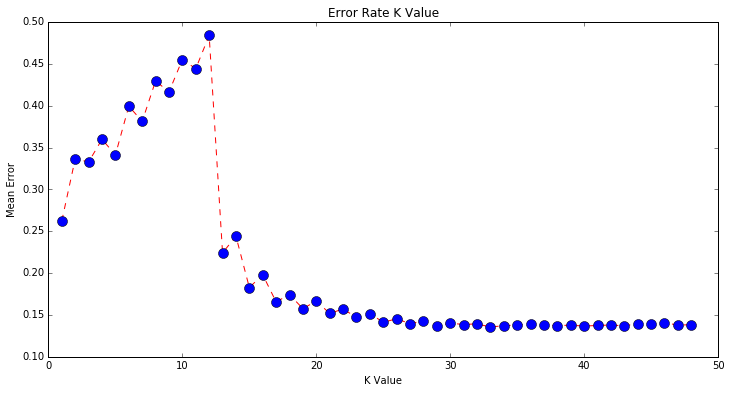

In [40]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1,49), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_dtm_train,y_train)
y_pred_class_knn = knn.predict(X_dtm_test)

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,class_weight={0:.7,1:.3}, min_samples_leaf=15)
classifier.fit(X_dtm_train,y_train)
y_pred_tree = classifier.predict(X_dtm_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rand_classifer = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rand_classifer.fit(X_dtm_train,y_train)
y_pred_randforest = rand_classifer.predict(X_dtm_test)

In [44]:
print("SVM ACCURACY:",metrics.accuracy_score(y_test,y_pred_svm))
print('SVM CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_svm))
print("===> **SVM F1 SCORE",metrics.f1_score(y_test, y_pred_svm))
print("===> **SVM Recall SCORE",metrics.recall_score(y_test, y_pred_svm))
print("===> **SVM Precision SCORE",metrics.precision_score(y_test, y_pred_svm))
print("===> **SVM ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_svm))
print("##################################################################################################")
print("LogisticReg ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_logreg))
print('LogisticReg CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_logreg))
print("===> **LogisticReg F1 SCORE",metrics.f1_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Recall SCORE",metrics.recall_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg Precision SCORE",metrics.precision_score(y_test, y_pred_class_logreg))
print("===> **LogisticReg ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_logreg))
print("##################################################################################################")
print("NaiveBayes ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_nb))
print('NaiveBayes CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_nb))
print("===> **NaiveBayes F1 SCORE",metrics.f1_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Recall SCORE",metrics.recall_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes Precision SCORE",metrics.precision_score(y_test, y_pred_class_nb))
print("===> **NaiveBayes ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_nb))
print("##################################################################################################")
print("KNN ACCURACY:",metrics.accuracy_score(y_test,y_pred_class_knn))
print('KNN CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_class_knn))
print("===> **KNN F1 SCORE",metrics.f1_score(y_test, y_pred_class_knn))
print("===> **KNN Recall SCORE",metrics.recall_score(y_test, y_pred_class_knn))
print("===> **KNN Precision SCORE",metrics.precision_score(y_test, y_pred_class_knn))
print("===> **KNN ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_class_knn))
print("##################################################################################################")
print("Dtree ACCURACY:",metrics.accuracy_score(y_test,y_pred_tree))
print('Dtree CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_tree))
print("===> **Dtree F1 SCORE",metrics.f1_score(y_test, y_pred_tree))
print("===> **Dtree Recall SCORE",metrics.recall_score(y_test, y_pred_tree))
print("===> **Dtree Precision SCORE",metrics.precision_score(y_test, y_pred_tree))
print("===> **Dtree ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_tree))
print("##################################################################################################")
print("RandForest ACCURACY:",metrics.accuracy_score(y_test,y_pred_randforest))
print('RandForest CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(y_test,y_pred_randforest))
print("===> **RandForest F1 SCORE",metrics.f1_score(y_test, y_pred_randforest))
print("===> **RandForest Recall SCORE",metrics.recall_score(y_test, y_pred_randforest))
print("===> **RandForest Precision SCORE",metrics.precision_score(y_test, y_pred_randforest))
print("===> **RandForest ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_randforest))

SVM ACCURACY: 0.8930387794024157
SVM CLASSIFIER CONFUSTION MATRIX: col_0        0     1
Labelenc            
0         1005   447
1          226  4614
===> **SVM F1 SCORE 0.932027067972932
===> **SVM Recall SCORE 0.9533057851239669
===> **SVM Precision SCORE 0.9116775340841731
===> **SVM ROC_AUC SCORE 0.8227272727272726
##################################################################################################
LogisticReg ACCURACY: 0.8650667514303878
LogisticReg CLASSIFIER CONFUSTION MATRIX: col_0        0     1
Labelenc            
0         1038   414
1          435  4405
===> **LogisticReg F1 SCORE 0.912102702143079
===> **LogisticReg Recall SCORE 0.9101239669421488
===> **LogisticReg Precision SCORE 0.9140900601784603
===> **LogisticReg ROC_AUC SCORE 0.8125
##################################################################################################
NaiveBayes ACCURACY: 0.8657024793388429
NaiveBayes CLASSIFIER CONFUSTION MATRIX: col_0        0     1
Labelenc            

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.3, max_depth=10)
gbcl = gbcl.fit(X_dtm_train, y_train)

In [46]:
y_pred_gbcl = gbcl.predict(X_dtm_test)

In [47]:
print("GBC: ACCURACY:",metrics.accuracy_score(y_test,y_pred_gbcl))
print('GBC CLASSIFIER CONFUSTION MATRIX:%\n',pd.crosstab(y_test,y_pred_gbcl))
print("===> **GBC F1 SCORE",metrics.f1_score(y_test, y_pred_gbcl))
print("===> **GBC Recall SCORE",metrics.recall_score(y_test, y_pred_gbcl))
print("===> **GBC Precision SCORE",metrics.precision_score(y_test, y_pred_gbcl))
print("===> **GBC ROC_AUC SCORE",metrics.roc_auc_score(y_test, y_pred_gbcl))

GBC: ACCURACY: 0.8765098537825811
GBC CLASSIFIER CONFUSTION MATRIX:%
 col_0       0     1
Labelenc           
0         844   608
1         169  4671
===> **GBC F1 SCORE 0.9232137563000297
===> **GBC Recall SCORE 0.9650826446280992
===> **GBC Precision SCORE 0.8848266717181285
===> **GBC ROC_AUC SCORE 0.7731749311294766


In [48]:
import pickle


In [49]:
KNNmodel2 = 'KNNMODEL_COMPLAINTTEXT.sav'

In [50]:
pickle.dump(knn,open(KNNmodel2,'wb'))

In [51]:
vectorizer2 = 'vectorizer_complainttext.pk'

In [52]:
pickle.dump(tfidf_vec,open(vectorizer2,'wb'))

In [53]:
Randomfor = 'RandomForest_complainttext.sav'

In [55]:
pickle.dump(rand_classifer,open(Randomfor,'wb'))